Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

Section 01: Exploratory Data Analysis

Are there any null values or outliers? How will you wrangle/handle them?
Are there any variables that warrant transformations?
Are there any useful variables that you can engineer with the given data?
Do you notice any patterns or anomalies in the data? Can you plot them?

Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

Which marketing campaign is most successful?
What does the average customer look like for this company?
Which products are performing best?
Which channels are underperforming?

# Performing section 1 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew 

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('marketing_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### step 1 handling missing values

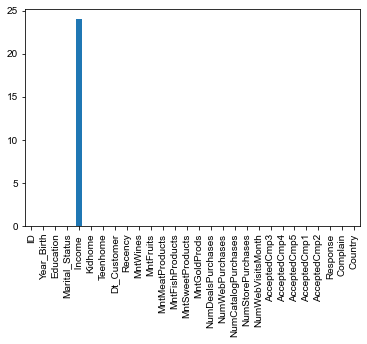

In [5]:
g=df.isna().sum().plot.bar(x='x',y='y')
sns.set(rc={'figure.figsize':(5,5)})

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### we need to stip off the dollar from the income column and is converted to a float value

In [7]:
df[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [8]:
df['Education'][325]

'Graduation'

In [9]:

for i in range(0,df.shape[0]):
    try:
        if(np.isnan(df[' Income '][i])):
            df[' Income '][i]=0.00
    except TypeError:
        n=df[' Income '][i]
        n=n.replace(',','')
        n=n.replace('$','')
        n=float(n)
        df[' Income '][i]=n
    

<ipython-input-9-c2ac8f5e58ec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Income '][i]=n
<ipython-input-9-c2ac8f5e58ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Income '][i]=0.00


In [10]:
df[' Income ']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: object

In [11]:
df[' Income '].mean()

51687.459375

In [12]:
df[' Income '].std()

25609.34272959132

In [13]:
skew(df[' Income '])

6.325070248147102

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


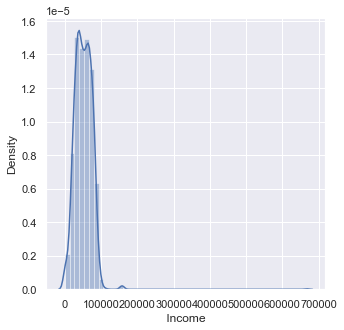

In [14]:
inc=sns.distplot(df[' Income '])
# inc.set_ylim(0,0.0000001)
# sns.set(rc = {'figure.figsize':(10,10)})
plt.show()

In [15]:
med=df[' Income '].median()

In [16]:
df['Education'][325]

'Graduation'

## since most of income values are towards the left of the distribution there is a positive skewness hence we can replace the missing values using median 

In [17]:
for i in range(0,df.shape[0]):
    if(df[' Income '][i]==0.00):
        df[' Income '][i]=med

<ipython-input-17-2998f2a1977d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Income '][i]=med


step2 To convert categorical features

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


UNIVARIATE ANALYSIS OF EDUCATION AND MARITAL_STATUS

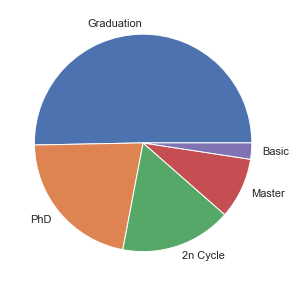

In [19]:
lis=list(df['Education'].value_counts())
lis2=list(df['Education'].unique())

plt.pie(lis,labels=lis2)
plt.show()

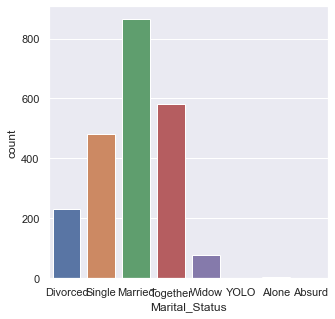

In [20]:
lis=list(df['Marital_Status'].value_counts())
lis2=list(df['Marital_Status'].unique())

sns.countplot(x='Marital_Status',data=df)
plt.show()

FROM THE UNIVARITE ANALYSIS DONE ABOVE WE REALIZE THAT THERE ARE A FEW OUTLIERS IN EACH FEATURE AND THEY CAN BE REMOVED

### finding outliers in income using IQR

In [21]:
Q1=np.quantile(df[' Income '],0.25)
Q3=np.quantile(df[' Income '],0.75)

IQR=Q3-Q1

In [22]:
lower_outlier=np.quantile(df[' Income '],0.25)-1.5*IQR 

upper_outlier=np.quantile(df[' Income '],0.75)+1.5*IQR

In [23]:
lis=list(df[df[' Income ']>=upper_outlier].index)

In [24]:
df.shape

(2240, 28)

In [25]:
rows=df.index[lis]
df.drop(rows,inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

### widow yolo absurd and alone can be merged in into a new category called others

In [27]:
len(df[df['Marital_Status']=='Widow'])

77

In [28]:
df2=df.copy()

In [29]:
lis=list(df2[df2['Marital_Status']=='Widow'].index)
lis2=list(df2[df2['Marital_Status']=='YOLO'].index)
lis3=list(df2[df2['Marital_Status']=='Alone'].index)
lis4=list(df2[df2['Marital_Status']=='Absurd'].index)

In [30]:
for i in lis+lis2+lis3+lis4:
    df2.at[i,'Marital_Status']='Others'

visualing other columns outliers through box plot

In [31]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [32]:
df_temp=df2.drop(['ID','Year_Birth','Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],axis=1)

<AxesSubplot:>

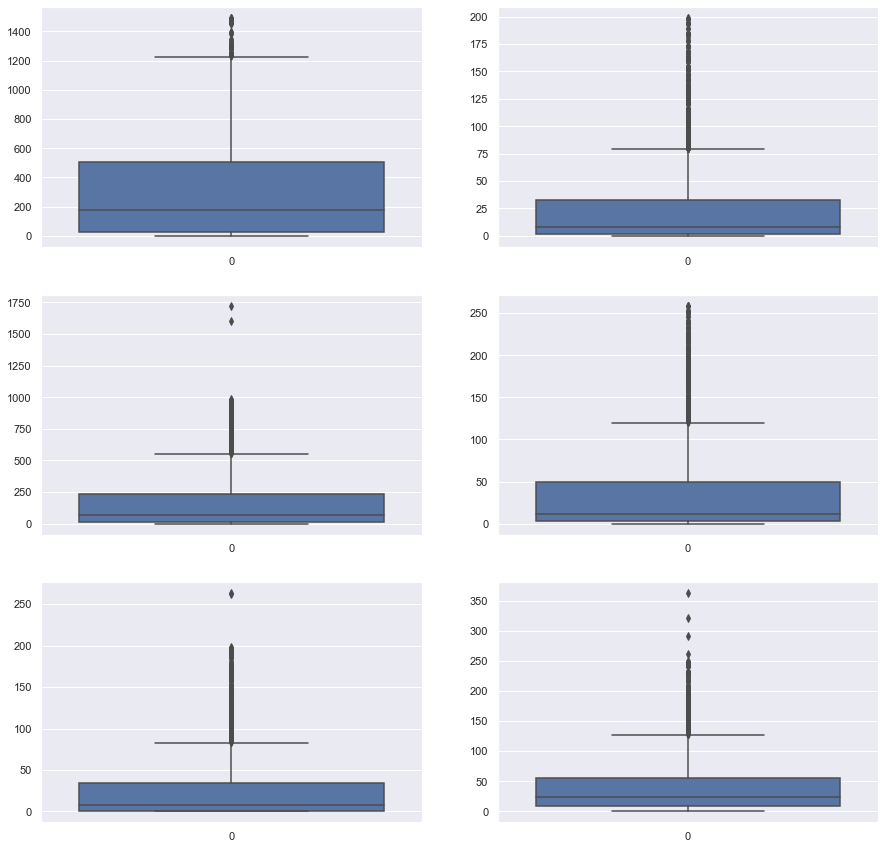

In [33]:

fig,axes=plt.subplots(3,2,figsize=(15,15))
sns.boxplot(data=df_temp['MntWines'],ax=axes[0,0])
sns.boxplot(data=df_temp['MntFruits'],ax=axes[0,1])
sns.boxplot(data=df_temp['MntMeatProducts'],ax=axes[1,0])
sns.boxplot(data=df_temp['MntFishProducts'],ax=axes[1,1])
sns.boxplot(data=df_temp['MntSweetProducts'],ax=axes[2,0])
sns.boxplot(data=df_temp['MntGoldProds'],ax=axes[2,1])

Dropping the above outliers using iqr

do we need to drop it becuase the size of the dataset is small

In [34]:
cols=['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

In [35]:
df2_temp=df2.copy()
for i in cols:
    Q1=np.quantile(df2_temp[i],0.25)
    Q3=np.quantile(df2_temp[i],0.75)
    
    IQR=Q3-Q1
    
    lower_outlier=np.quantile(df2_temp[i],0.25)-1.5*IQR 

    upper_outlier=np.quantile(df2_temp[i],0.75)+1.5*IQR
    
    lis=list(df2_temp[df2_temp[i]>=upper_outlier].index)
    
    rows=df2_temp.index[lis]
    df2_temp.drop(rows,inplace=True)
    
    df2_temp.reset_index(drop=True,inplace=True)

In [36]:
df2.shape

(2232, 28)

In [37]:
df2_temp.shape

(1253, 28)

## variables that require transformation

Dt_Customer requrires transformation as it is in string

In [38]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [39]:
df2['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

### Are there any useful variables that you can engineer with the given data?

 THIS QUESTION CAN BE ANSWERED USING A HEATMAP THAT SHOWS THE CORRELATION BETWEEN DIFFERENT FEATURES

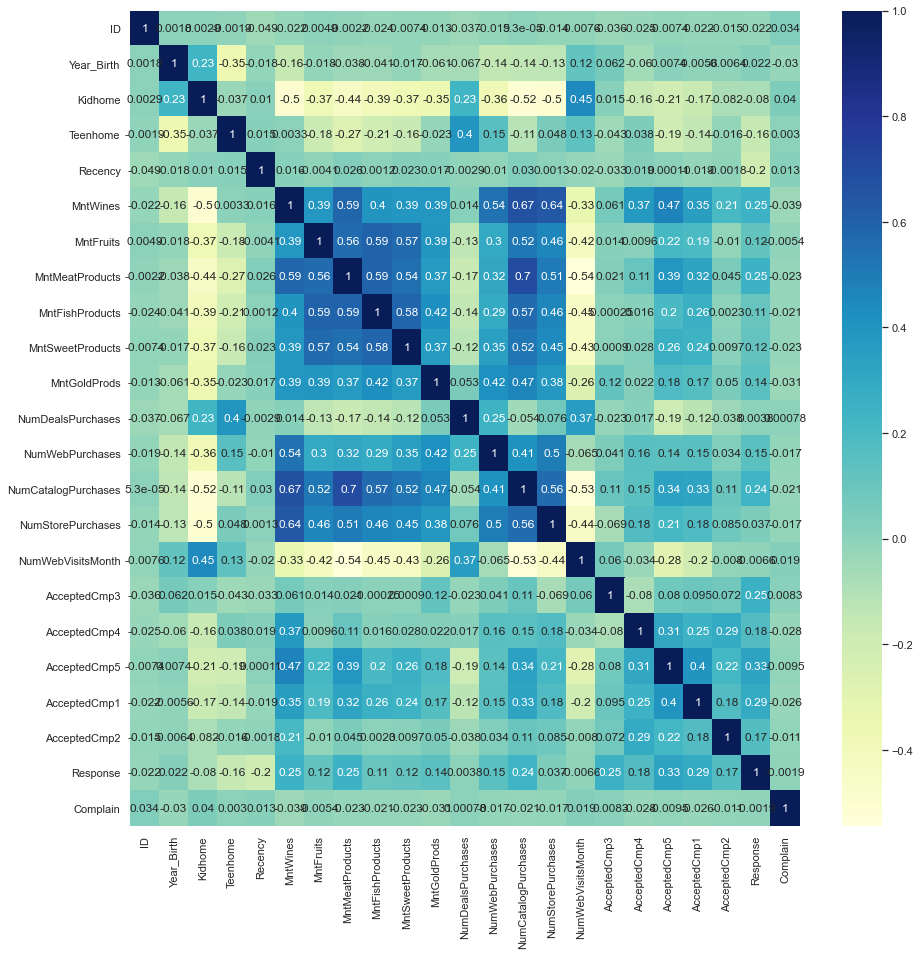

In [40]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
df2plt=sns.heatmap(df2.corr(),cmap='YlGnBu',annot=True)


THE BELOW FEATURES HAVE BEEN REMOVED BECUASE THEY DONT GIVE US MUCH INFORMATION

In [41]:
df4=df2.copy()
df4.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],axis=1,inplace=True)

Are there any useful variables that you can engineer with the given data?

1.teenhome and kidhome can be merged into a single feature

2.MntMeatProducts and MntFishProducts can be merged into one single feature

In [42]:
df5=df4.copy()
df5['Teen&kid']=df5['Kidhome']+df5['Teenhome']
df5['nonveg']=df5['MntMeatProducts']+df5['MntFishProducts']

In [43]:
df5.drop(['Teenhome','Kidhome','MntMeatProducts','MntFishProducts'],axis=1,inplace=True)

In [44]:
df5.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Teen&kid,nonveg
0,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,189,218,1,4,4,6,1,1,0,SP,0,490
1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,0,37,1,7,3,7,5,1,0,CA,0,71
2,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,2,30,1,3,2,5,2,0,0,US,1,74
3,1967,Graduation,Together,32474.0,2014-05-11,0,10,0,0,0,1,1,0,2,7,0,0,AUS,2,1
4,1989,Graduation,Single,21474.0,2014-04-08,0,6,16,0,34,2,3,1,2,7,1,0,SP,1,35


In [45]:
df4.columns

Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Country'],
      dtype='object')

Do you notice any patterns or anomalies in the data? Can you plot them?

1.It has been noticed that the marital status of each of the Education value has been  between 37 and 40 percent of married people

In [46]:
lis1=list(df4[df4['Education']=='PhD']['Marital_Status'].value_counts()/df4[df4['Education']=='PhD'].value_counts().sum() )
lis2=list(df4[df4['Education']=='Basic']['Marital_Status'].value_counts()/df4[df4['Education']=='Basic'].value_counts().sum() )

lis3=list(df4[df4['Education']=='Master']['Marital_Status'].value_counts()/df4[df4['Education']=='Master'].value_counts().sum() )

lis4=list(df4[df4['Education']=='Graduation']['Marital_Status'].value_counts()/df4[df4['Education']=='Graduation'].value_counts().sum() )

lis5=list(df4[df4['Education']=='2n Cycle']['Marital_Status'].value_counts()/df4[df4['Education']=='2n Cycle'].value_counts().sum() )

lis1


[0.3921161825726141,
 0.24066390041493776,
 0.2033195020746888,
 0.1078838174273859,
 0.056016597510373446]

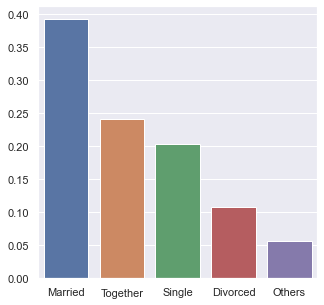

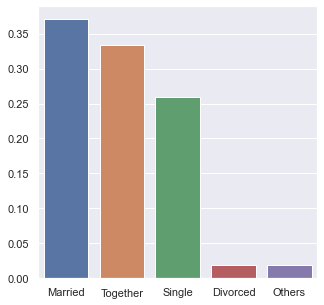

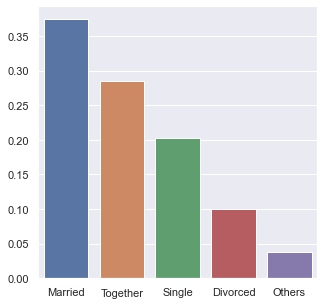

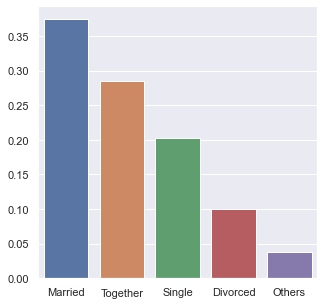

In [47]:
sns.barplot(x=['Married','Together','Single','Divorced','Others'],y=lis1)
plt.show()
sns.barplot(x=['Married','Together','Single','Divorced','Others'],y=lis2)
plt.show()
sns.barplot(x=['Married','Together','Single','Divorced','Others'],y=lis3)
plt.show()
sns.barplot(x=['Married','Together','Single','Divorced','Others'],y=lis3)
plt.show()


## Section 02: Statistical Analysis


What factors are significantly related to the number of store purchases?


We can first do a univariate analysis of the store purchases and the plot a feature importance graph to find out the most important features to determine the storepurchases

In [48]:
df4['NumStorePurchases'].unique()

array([ 6,  7,  5,  2,  3,  9, 10,  0,  8,  4, 13, 12,  1, 11],
      dtype=int64)

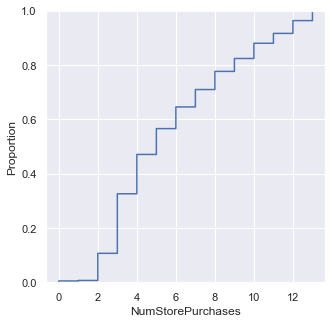

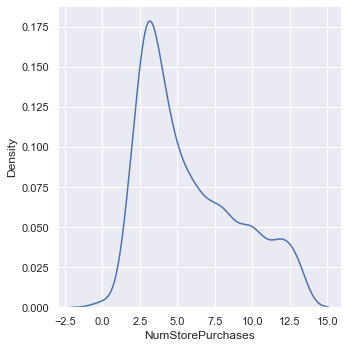

In [49]:
sns.ecdfplot(df5['NumStorePurchases'])
plt.show()
sns.displot(df5['NumStorePurchases'],kind="kde")

from the pdf and cdf functions above we can say that StorePurchases is a right skewed distribution and close to 62% of the
customers have less than 6 purchases at a time

In [50]:
df6=df5.copy()
from sklearn.model_selection import train_test_split


ONE HOT ENCODING EDUCATION AND MARITAL STATUS COLUMNS AND DROPPING BIRTH YEAR AND CUSTOMER DATE COLUMNS AS THEY ARE OF NO SIGNIFICANCE

In [51]:
df6_dum=pd.get_dummies(df6['Education'],drop_first=True)
df6=pd.concat([df6,df6_dum],axis=1)

In [52]:
df6_dum=pd.get_dummies(df6['Marital_Status'],drop_first=True)
df6=pd.concat([df6,df6_dum],axis=1)

In [53]:
df6_dum=pd.get_dummies(df6['Country'],drop_first=True)
df6=pd.concat([df6,df6_dum],axis=1)

In [54]:
df6.drop(['Education','Marital_Status','Year_Birth','Dt_Customer','Country'],axis=1,inplace=True)

In [55]:
df6

,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,Others,Single,Together,CA,GER,IND,ME,SA,SP,US
0,84835.0,0,189,104,189,218,1,4,4,6,...,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,464,5,0,37,1,7,3,7,...,0,1,0,1,0,0,0,0,0,0
2,67267.0,0,134,11,2,30,1,3,2,5,...,0,0,0,0,0,0,0,0,0,1
3,32474.0,0,10,0,0,0,1,1,0,2,...,0,0,1,0,0,0,0,0,0,0
4,21474.0,0,6,16,0,34,2,3,1,2,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,66476.0,99,372,18,48,78,2,5,2,11,...,0,0,0,0,0,0,0,0,0,1
2228,31056.0,99,5,10,8,16,1,1,0,3,...,0,0,0,0,0,0,0,0,1,0
2229,46310.0,99,185,2,5,14,2,6,1,5,...,0,0,0,0,0,0,0,0,1,0
2230,65819.0,99,267,38,165,63,1,5,4,10,...,0,0,0,0,0,1,0,0,0,0


In [56]:
X=df6.drop('NumStorePurchases',axis=1)
y=df6['NumStorePurchases']

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

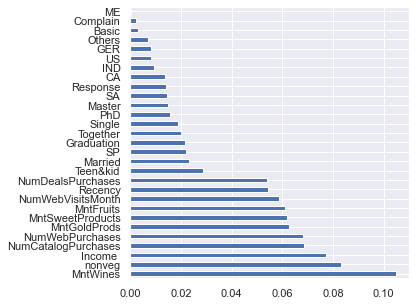

In [58]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [59]:
df6_country=df6.copy()
df6_country.drop(df6.columns.difference(['CA', 'GER','IND', 'ME', 'SA', 'SP', 'US','NumStorePurchases']), 1, inplace=True)

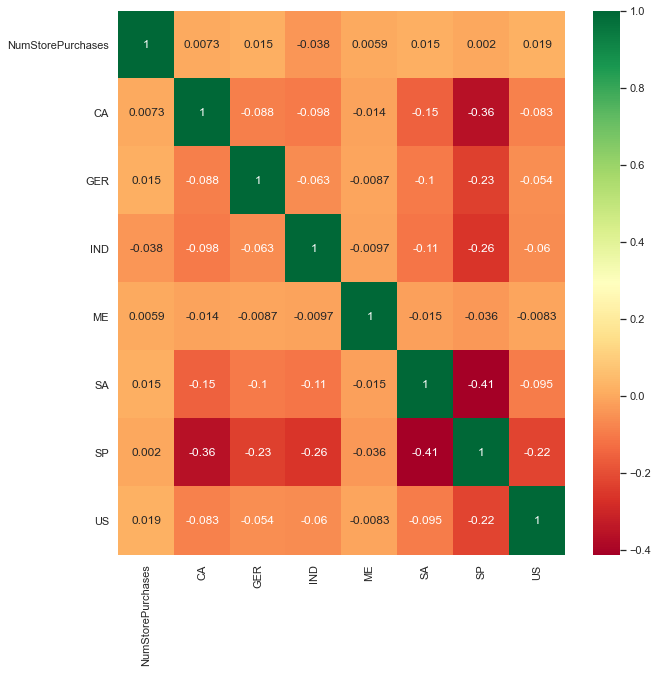

In [60]:
corrmat = df6_country.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df6_country[top_corr_features].corr(),annot=True,cmap="RdYlGn")

well,the correlation matrix does not say much about the store purchases,so lets plot a graph between each country and the purchases per store

In [61]:
lis=[]
lis_country=list(df['Country'].unique())
for i in lis_country:
    lis.append(df[df['Country']==i]['NumStorePurchases'].sum())
lis


[6350, 1568, 657, 879, 721, 785, 1985, 19]

In [62]:
lis2=list(df['Country'].value_counts())
lis2

[1092, 335, 267, 160, 147, 120, 108, 3]

In [63]:
for i in range(0,len(lis)):
    lis2[i]=lis[i]/lis2[i]

In [64]:
lis2

[5.815018315018315,
 4.6805970149253735,
 2.460674157303371,
 5.49375,
 4.904761904761905,
 6.541666666666667,
 18.37962962962963,
 6.333333333333333]

<AxesSubplot:>

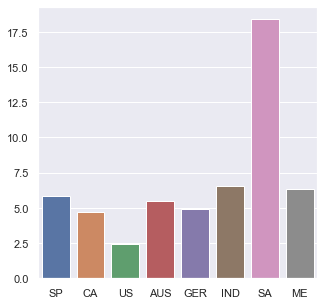

In [65]:
sns.barplot(x=lis_country,y=lis2)

USA is clearly in the last so her performance is not the best when it comes to Number of store purchases

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [68]:
reg = LinearRegression().fit(X_train, y_train)

In [69]:
reg.score(X_test,y_test)

0.6190738355738952

In [70]:
preds = reg.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  2.032215911843665
Median value of target variable:  5.0


Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

<AxesSubplot:xlabel='MntGoldProds', ylabel='NumStorePurchases'>

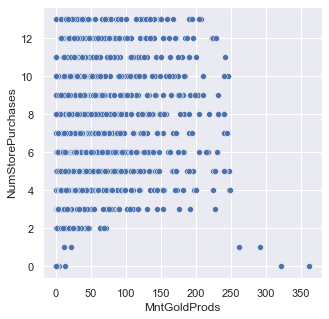

In [71]:
sns.scatterplot(data=df6,x='MntGoldProds',y='NumStorePurchases')

In [72]:
df6['MntGoldProds'].corr(df6['NumStorePurchases'])

0.3794204809531672

we thus learn from the scatterplot and corrleation values that there is a positive relationship between amount of gold purchased and store purhcases

Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?


In [96]:
df6_temp=df6[['Married','PhD','nonveg']]
df6_temp['marandphd']=0
for i in range(0,df6_temp.shape[0]):
    if(df6_temp['Married'][i]==1 and df6_temp['PhD'][i]==1):
        df6_temp['marandphd'][i]=1

<ipython-input-96-f69467118925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_temp['marandphd']=0
<ipython-input-96-f69467118925>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_temp['marandphd'][i]=1
C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.u

In [97]:
df6_temp

,Married,PhD,nonveg,marandphd
0,0,0,490,0
1,0,0,71,0
2,1,0,74,0
3,0,0,1,0
4,0,0,35,0
...,...,...,...,...
2227,0,1,173,0
2228,1,0,16,0
2229,0,0,103,0
2230,1,0,850,0


<AxesSubplot:xlabel='marandphd', ylabel='nonveg'>

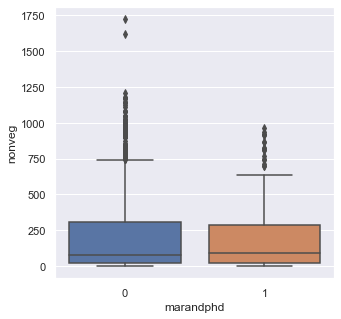

In [99]:
sns.boxplot(x=df6_temp['marandphd'],y=df6['nonveg'])

We thus find that married phd candidates have spend lesser on meat products

In [100]:
df6.head()

,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,Others,Single,Together,CA,GER,IND,ME,SA,SP,US
0,84835.0,0,189,104,189,218,1,4,4,6,...,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,464,5,0,37,1,7,3,7,...,0,1,0,1,0,0,0,0,0,0
2,67267.0,0,134,11,2,30,1,3,2,5,...,0,0,0,0,0,0,0,0,0,1
3,32474.0,0,10,0,0,0,1,1,0,2,...,0,0,1,0,0,0,0,0,0,0
4,21474.0,0,6,16,0,34,2,3,1,2,...,0,1,0,0,0,0,0,0,1,0


What other factors are significantly related to amount spent on fish?

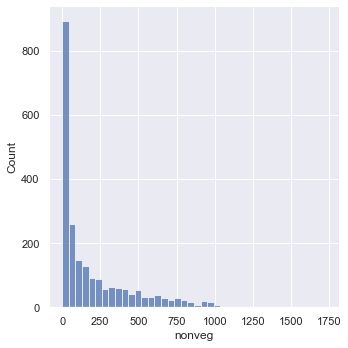

In [103]:
inc=sns.displot(df6['nonveg'])
# inc.set_ylim(0,0.0000001)
# sns.set(rc = {'figure.figsize':(10,10)})
plt.show()

In [113]:
X=df6.drop('nonveg',axis=1)
y=df6['nonveg']
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

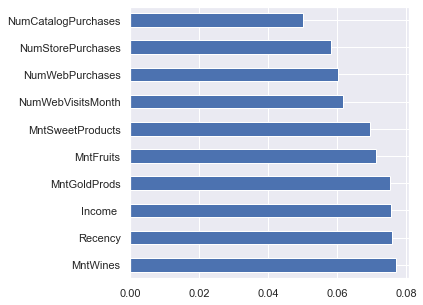

In [115]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

from the feature importance graph we can say that mntWines Recency income and mnt gold products are the most important factors taht are associated with the amount of meat products purhcased